In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
plt.style.use('ggplot')

In [3]:
def load_dots(input, start, n, skip):
    dots = []
    count = 0
    with open(input) as f:
        for line in f:
            val = (float(line)-start)/1e6
            if val < skip: continue
            dots.append(val)
            count = count + 1
            if count > n: break
            if count % (n/5) == 0: print str(count) + "... "
    yaxis = np.ones(len(dots))*[random.random() for _ in xrange(len(dots))]                
    return dots, yaxis

def get_first_timestamp(files):
    start = float("inf")
    for file in files:
        with open(file) as f:
            t = float(f.readline())
            if t < start: start = t
    return start

def make_dots(ax, n, samples, client0, client1):
    start = get_first_timestamp([client0, client1])
    
    c0, y = load_dots(client0, start, n, skip)
    plt.scatter(c0, y, lw = 0, s=3)
    
    c1, y = load_dots(client1, start, n, skip)
    plt.scatter(c1, -1*y, lw = 0, s=3, color='red')
    

#ax = plt.figure().add_subplot(111)
#make_dots(ax, 10000,
#          "reqdots-run-foreground-issdm-24-reqs-issdm-24.1477001295.1", 
#          "reqdots-run-foreground-issdm-27-reqs-issdm-27.1477001295.1")
#ax.set_xlim(0, 100)

20000... 
40000... 
60000... 
80000... 
100000... 
20000... 
40000... 
60000... 
80000... 
100000... 
20000... 
40000... 
60000... 
80000... 
100000... 
20000... 
40000... 
60000... 
80000... 
100000... 
200000... 
400000... 
600000... 
800000... 
1000000... 
200000... 
400000... 


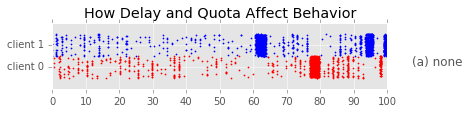

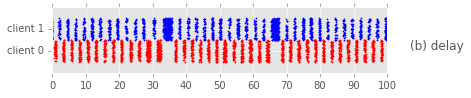

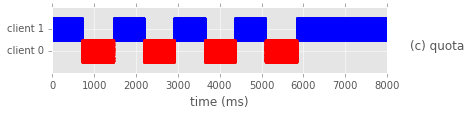

In [4]:
fig = plt.figure()
ax = plt.figure().add_subplot(311)
samples = 100000
skip = 10000
make_dots(ax, samples, skip, 
          "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client0-issdm-24.1477027634.1",
          "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client1-issdm-24.1477027636.1")
ax.set_xlim(11900, 12000)
plt.yticks([-0.5, 0.5], ["client 0", "client 1"], rotation='horizontal')
plt.xticks(range(11900, 12001, 10), range(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel("(a) none", fontsize=12, rotation=0, labelpad=50)
ax.set_title("How Delay and Quota Affect Behavior")
plt.savefig('capdelay-quota-behavior-a.png', dpi=300, bbox_inches='tight')

ax = plt.figure().add_subplot(312)
samples = 100000
skip = 11500
make_dots(ax, samples, skip, 
          "../results-reqdots-sameclient-capdelay-0.00048828125/reqdots-sameclient-capdelay-0.00048828125-run-foreground-issdm-24-reqs-client0-issdm-24.1477031213.1",
          "../results-reqdots-sameclient-capdelay-0.00048828125/reqdots-sameclient-capdelay-0.00048828125-run-foreground-issdm-24-reqs-client1-issdm-24.1477031214.1")
ax.set_xlim(11900, 12000)
ax.set_yticks([])
plt.xticks(range(11900, 12001, 10), range(0, 110, 10))
plt.yticks([-0.5, 0.5], ["client 0", "client 1"], rotation='horizontal')
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel("(b) delay", fontsize=12, rotation=0, labelpad=50)
plt.savefig('capdelay-quota-behavior-b.png', dpi=300, bbox_inches='tight')

ax = plt.figure().add_subplot(313)
samples = 1000000
skip = 10000
make_dots(ax, samples, skip, 
          "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client0-issdm-24.1477011047.1",
          "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client1-part0-issdm-24.1477011048.1")
ax.set_xlim(10000, 18000)
ax.set_yticks([])
plt.xticks(range(10000, 18001, 1000), range(0, 9000, 1000))
plt.yticks([-0.5, 0.5], ["client 0", "client 1"], rotation='horizontal')
ax.set_xlabel("time (ms)")
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel("(c) quota", fontsize=12, rotation=0, labelpad=50)

plt.savefig('capdelay-quota-behavior-c.png', dpi=300, bbox_inches='tight')